# Data visualisation
Here we want to visualize some statistics about the data we have.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error
)
import geopandas as gpd
import libpysal as lp
from spreg import OLS
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [31]:
# Load the data 
#data = pd.read_csv('data_trees_modified.csv')
trees = gpd.read_file('../data/geojson/geo_data_trees.geojson')

# take just the first 1000 rows
#trees = trees.iloc[:1000]
# remove the last row of the data (summary)
trees = trees.drop([len(trees)-1])

original_data = pd.read_csv('../data/alberi-manutenzioni.csv', sep=';')

In [3]:
trees.columns

Index(['Tree ID', 'Name', 'DBH (cm)', 'Replacement Value (eur)',
       'Carbon Storage (kg)', 'Carbon Storage (eur)',
       'Gross Carbon Sequestration (kg/yr)',
       'Gross Carbon Sequestration (eur/yr)', 'Avoided Runoff (l/yr)',
       'Avoided Runoff (eur/yr)', 'Carbon Avoided (kg/yr)',
       'Carbon Avoided (eur/yr)', 'Pollution Removal (g/yr)',
       'Pollution Removal (eur/yr)', 'Energy Savings (eur/yr)',
       'Total Annual Benefits (eur/yr)', 'Height (m)',
       'Oxygen Production (kg/yr)', 'Crown Height (m)', 'Crown Width (m)',
       'Canopy Cover (m2)', 'Leaf Area (m2)', 'Leaf Biomass (kg)', 'Latitude',
       'Longitude', 'Species Name', 'geometry'],
      dtype='object')

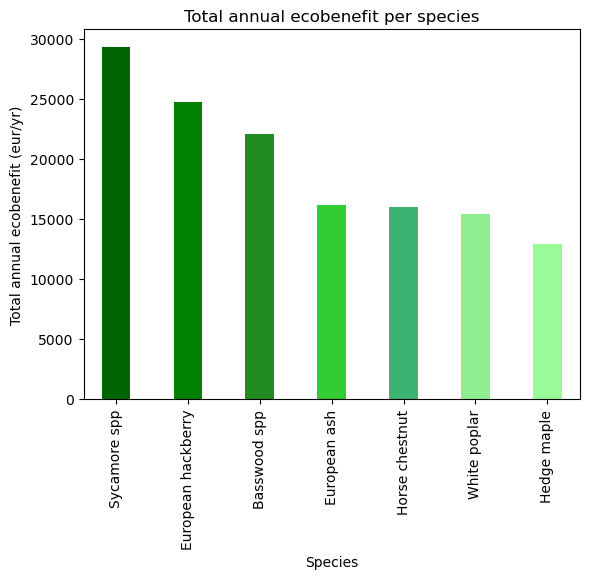

In [20]:

# Group the data by species and sum the total annual benefits
species_benefits = trees.groupby('Name')['Total Annual Benefits (eur/yr)'].sum()

# Sort the species by total annual benefits and plot the top 5
top_species = species_benefits.sort_values(ascending=False).head(7)
# maje the colors a palette of green
colors = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#90EE90', '#98FB98']
top_species.plot(kind='bar', color=colors, width=0.4)
plt.title('Total annual ecobenefit per species')
plt.ylabel('Total annual ecobenefit (eur/yr)')
plt.xlabel('Species')
plt.show()

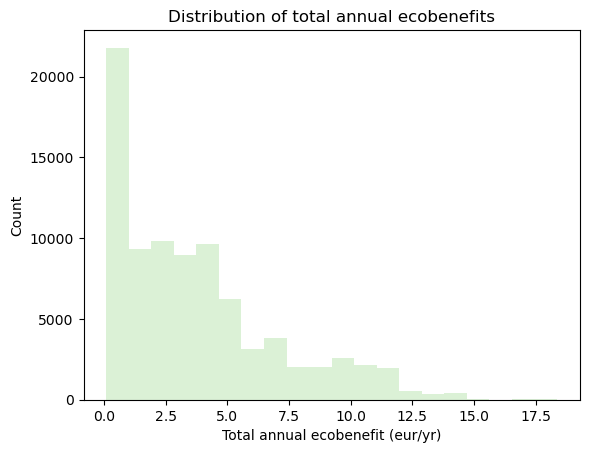

In [21]:
# Let's look at the distribution of the total annual benefits
# Plot the distribution of the total annual benefits
plt.hist(trees['Total Annual Benefits (eur/yr)'], bins=20)
plt.title('Distribution of total annual ecobenefits')
plt.xlabel('Total annual ecobenefit (eur/yr)')
plt.ylabel('Count')
plt.show()

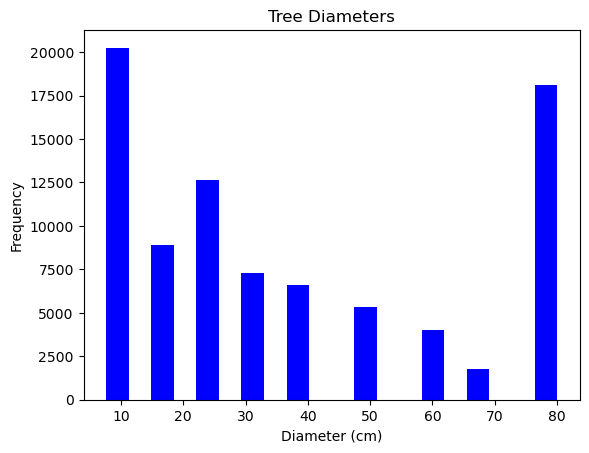

In [ ]:
# Create a histogram of the tree diameters, color light blue
plt.hist(trees['DBH (cm)'], bins=20, color='#ADD8E6')
plt.title('Tree Diameters')
plt.xlabel('Diameter (cm)')
plt.ylabel('Frequency')
plt.show()

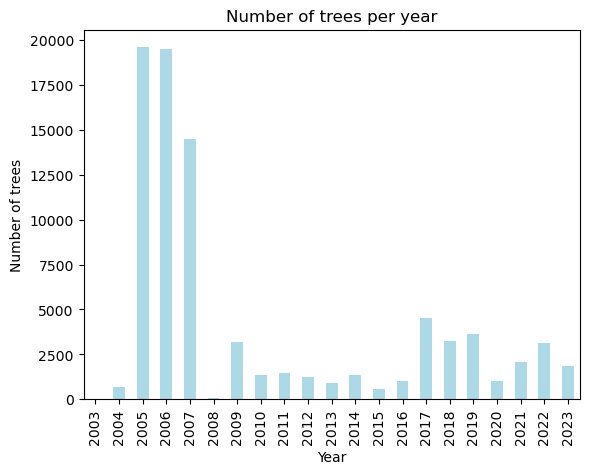

In [32]:
# I want to plot the number of trees per year

# first add the column 'Data inserimento inventario' of original_data to trees
trees['Data inserimento inventario'] = original_data['Data inserimento inventario']

# convert the column to datetime
trees['Data inserimento inventario'] = pd.to_datetime(trees['Data inserimento inventario'])

# extract the year from the datetime
trees['Year'] = trees['Data inserimento inventario'].dt.year

# group the data by year and count the number of trees
trees_per_year = trees.groupby('Year')['Name'].count()

# plot the number of trees per year
trees_per_year.plot(kind='bar', color='#ADD8E6')
plt.title('Number of trees per year')
plt.xlabel('Year')
plt.ylabel('Number of trees')
plt.show()

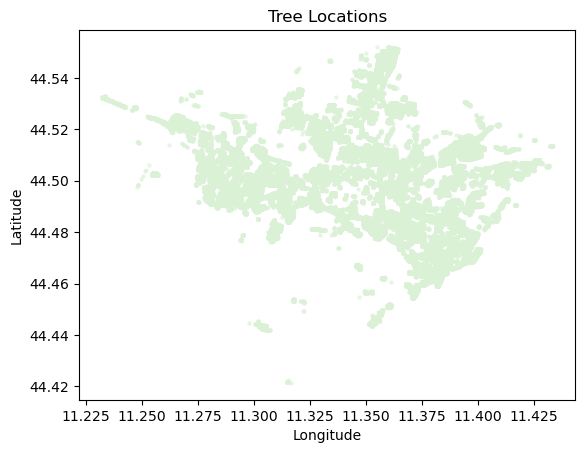

In [34]:
# Create a scatter plot of the tree locations
plt.scatter(trees['Longitude'], trees['Latitude'], s=5, alpha=0.5)
plt.title('Tree Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/Users/luca/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


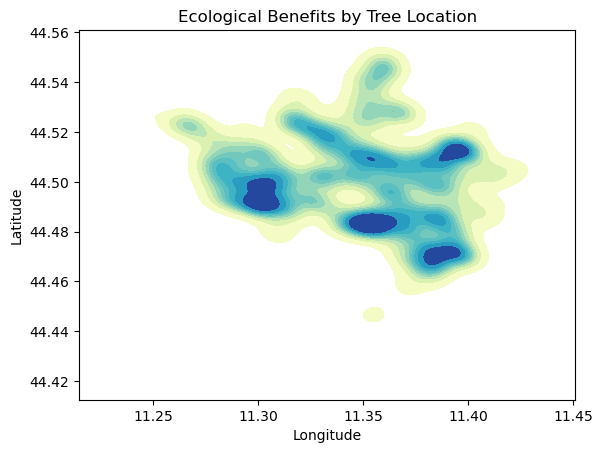

In [35]:
import seaborn as sns

# Create a heatmap of the ecological benefits of each tree
sns.kdeplot(trees['Longitude'], trees['Latitude'], weights=trees['Total Annual Benefits (eur/yr)'], cmap='YlGnBu', shade=True)
plt.title('Ecological Benefits by Tree Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()